<a href="https://colab.research.google.com/github/khadijabendib/Argumentation/blob/main/Argumentation_sans_cycle_finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
Arguments=['a','b','c','e','f','l']

list2=[]
list2.append(('a', 'b'))
list2.append(('b', 'c'))
list2.append(('c', 'l'))
list2.append(('e', 'f'))
list2.append(('l', 'm'))
list2.append(('f', 'l'))

list2


[('a', 'b'), ('b', 'c'), ('c', 'l'), ('e', 'f'), ('l', 'm'), ('f', 'l')]

In [ ]:
n=int(input("Bonjour,Veuillez donner le nombre des arguments:"))
Arguments=[]
for i in range(n):
  x=input("Donne moi le nom de {} : ".format(i+1))
  Arguments.append(x)
  

In [ ]:
list2=[]
for i in (Arguments):
  for j in (Arguments):
    if i!=j:
      m=input("Est ce que {} ".format(i)+"  attaque {} ".format(j))
      while m!="oui" and m!="non":
        m=input("Est ce que {} ".format(i)+"  attaque {} (répondez par oui ou non ): ".format(j))
      if m=="oui":
        # if check_cycle(list2,(i,j))==True:
        #   print("Il y aura un cycle donc cette relation ne sera pas prise en compte")
        # else:
         list2.append((i,j))
        

In [2]:


Argument_accepte=[]
Argument_no_accepte=[]



for argument in Arguments:
  x=0
  for j in range(len(list2)):
    if list2[j][1]==argument:
      x=1
  if x==0:
    if argument not in Argument_accepte:
      Argument_accepte.append(argument)

for argument in Argument_accepte:
    for i in range(len(list2)):
      if list2[i][0]==argument:
        if list2[i][1] not in Argument_no_accepte:
           Argument_no_accepte.append(list2[i][1])

while (len(Argument_accepte)+len(Argument_no_accepte))<len(Arguments):
            for argument in Argument_accepte:
                for i in range(len(list2)):
                    if list2[i][0]==argument:
                        if list2[i][1] not in Argument_no_accepte:
                                Argument_no_accepte.append(list2[i][1])
            for arg in Argument_no_accepte:
                for i in range(len(list2)):
                    if list2[i][0]==arg:
                        v=0
                        for j in range(len(list2)):
                            if list2[i][1]==list2[j][1] and list2[j][0]!=list2[i][0]:
                                v=1
                        if v==0:
                            if list2[i][1] not in Argument_accepte:
                               Argument_accepte.append(list2[i][1]) 


In [ ]:
Argument_accepte,Argument_no_accepte

(['a', 'e', 'c', 'm'], ['b', 'f', 'l'])

In [3]:
print("Grounded semantic",Argument_accepte)
print("Completed semantic",Argument_accepte)
print("Prefered semantic",Argument_accepte)

Grounded semantic ['a', 'e', 'c', 'm']
Completed semantic ['a', 'e', 'c', 'm']
Prefered semantic ['a', 'e', 'c', 'm']


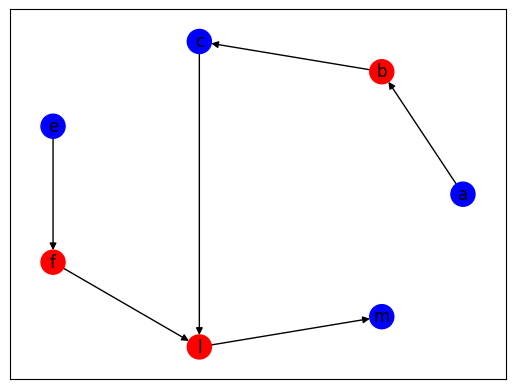

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

# Créer un graphe dirigé
G = nx.DiGraph()

# Ajouter les noeuds correspondant aux lettres
for lettre in Arguments:
    G.add_node(lettre)

# Ajouter les arêtes entre les noeuds
for i in range(len(list2)):
  G.add_edge(list2[i][0],list2[i][1])


# Dessiner le graphe
pos = nx.circular_layout(G)  # Positionner les noeuds en cercle
node_colors = ['blue' if n in Argument_accepte else 'red' if n in Argument_no_accepte else 'red' for n in G.nodes()]
nx.draw_networkx_nodes(G, pos=pos, node_color=node_colors)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos=pos, arrows=True)
plt.show()